# Data: Past, Present, Future |  Lab 4  |  2/09/2017


# The Role of Statistical Entities in Society: Least Squares, Linear Regression, and Machine Learning, oh my! 

To grab this notebook, go [here](data-ppf.github.io/labs/lab4/Lab4.ipynb). 

In [1]:
# To grab the other needed files, execute this code block command: 
!wget https://data-ppf.github.io/labs/lab4/Residuals.jpeg
!wget https://data-ppf.github.io/labs/lab4/Star.obs.jpeg

--2018-02-13 12:54:01--  https://data-ppf.github.io/labs/lab4/Residuals.jpeg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving data-ppf.github.io (data-ppf.github.io)... 151.101.21.147, 2a04:4e42:5::403
Connecting to data-ppf.github.io (data-ppf.github.io)|151.101.21.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126797 (124K) [image/jpeg]
Saving to: ‘Residuals.jpeg.2’

Residuals.jpeg.2    100%[===================>] 123.83K  --.-KB/s    in 0.006s  

2018-02-13 12:54:01 (20.6 MB/s) - ‘Residuals.jpeg.2’ saved [126797/126797]

--2018-02-13 12:54:01--  https://data-ppf.github.io/labs/lab4/Star.obs.jpeg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving data-ppf.github.io (data-ppf.github.io)... 151.101.21.147, 2a04:4e42:5::403
Connecting to data-ppf.github.io (data-ppf.github.io)|151.101.21.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100168 (98K) [image/jpeg]
Saving to: ‘Star.obs.jpeg.2’



In [2]:
# To ensure images in this notebook are displayed
# properly, please execute this block of code.

%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML

## Recall the "double role" of statistics in Politics:
1. <b>construction of statistical entities</b>: "stable objects" can be measured and used as forms of evidence and certainty (e.g., the GDP, unemployment, life expectation, citation indexs, etc.)
2. <b>explication and analysis of relationships between entities</b>: what are the relationships between objects and how does changing one influence others? 
-(see Desrosieres 61)
        
### Central Question: Does machine learning change the role of statistical entities in society?  Or, does machine learning matter?

<b>Tentative claim</b>: The form of this answer is historical, material, and technical. 
<b> Aside</b>: The field of machine learning christens old techniques as machine learning techniques (e.g., "linear regression" existed well before "machine learning"!)  

## Understanding Statistical Entities: 
#### Least Squares, Gaussians, and Regression
Rather than take a contemporary issue, let's see how the investigation of the history of a particular statistical technique gives us insight into how statistical entities are created and how they are used to make arguments. 

#### How did linear regression become thinkable? 
What problem was least squares suppose to solve? (Hint: recall Lengendre in 1805; what was the Laplace-Gaussian synthesis circa 1810?)

 ### Empirical Tradition
In the 18th century astronomers and physicists had a bunch of separate observations of a particular object of insterest (e.g., many observations of, say, the distance between a binary star system on different days and at different observatories) but it was not clear these observations could be combined.   
 
For cases involving objects whose existence was not in doubt (e.g., planets, stars, etc.), an empirical tradition existed which attempted to identify the "real" value of an observation by minimizing the sum of the squares of the "residuals". To wit:


![Residuals!](Residuals.jpeg)

In general, each residual, $r_i$, can be written as

$ r_i = y_i - y(x_i, \beta_i)$

which is the distance between the $i^{th}$ observation $y_i$. The "best fit line" is $y = \beta_0 + \beta_1(x)$, denoted in blue above.

We know from Desrosieres that linear regression doesn't really begin to take the form we are used to till Galton and Karl Pearson arrive on the scene in the second half of the 19th century. But that gets ahead of our story: first we need to understand what the Gauss-Laplace synthesis was that Desrosieres discusses, and how this synthesis lead to the gaussian being the "correct" distribution to use for a range of activities *unrelated to measuring error*. 

Imagine we are measuring the position of a star *in only 1-dimension*, i.e., we are measuring a star only along the x-axis.
![star_obs](Star.obs.jpeg)
Error made things difficult: How combine multiple observations for a single object? (How solve for variables that are overdetermined?) <b>NOTE THAT THE GRAPH ABOVE IS AN EXAMPLE OF THE "OBJECTIVE MEAN".</b>

<b>18th Century Answers to this problem:</b>
- Average observations to reduce number of equations!
- minimize the sum of absolute values of residuals!

## Legendre's answer in 1805? (Hint: See also Gauss' answer in 1795?)
<b>Answer: "method of least squares"</b> in which we

$min \sum{r_i} = min \sum_{i = 1}^{i}{(y_i-y(x_i,\beta_i))^2}$
 
This was mathematically similar to linear regression performed by Karl Pearson and Galton in the 1890s, but very different interpretations...

## Gauss-Laplace Synthesis and the Modelling of Error (i.e., the epistemic tradition)
- Theoretical description of error: tried lines ($-mx+b$), exponentials ($exp^{-x}$), logarithms ($log(c/x)$), but gaussians ($exp^{-x^2}$) eventually favored over all other distributions for describing "random"/"accidental" error. 

#### Why did Gaussians eclipse other models of error?
#### Disciplinary Aside: Gaussians in other fields...

## Laplace in 1810!

What did he discover? 

<b>The Central Limit Theorem:</b> 
0. Start with *any* distribution, known or unknown. 
1. Take $N$ samples of $X$ observations.
2. Take the mean of $X$ observations for each sample.
3. Plot the means of the samples.
4. The histogram of the sample of the means will <b>tend toward a gaussian as $N \rightarrow \infty $

...*that is, regardless of the distribution of your residuals, the means of $N$ samples of $X$ observations will always produce a gaussian distribution when one takes enough samples!*

Lets verify this for ourselves! 

In [3]:
from numpy.random import beta
from scipy.stats import beta as scipy_beta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generates S samples of N randomly sampled variables
def samples_from_beta(num_of_samples, sample_size):
    samples = beta(.5, .5, [num_of_samples, sample_size]) #NOTE THIS DISTRIBUTION IS NOT A GAUSSIAN
    return samples

def means_of_samples(samples_from_beta, num_of_samples, sample_size):
    means = []
    for sample in range(num_of_samples):
        means.extend([samples_from_beta[sample].mean()])
    means = np.array(means)    
    return means

def gaussian_curve_overlay(data, x):
    sigma = data.std()
    mu = data.mean()
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r') 
    return


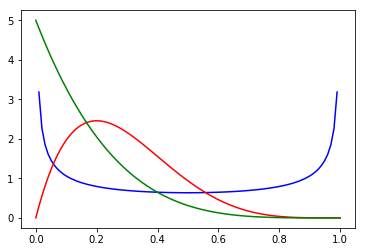

In [4]:
## A beta distribution is nothing like a gaussian!
## Here we plot out three beta distributions (with different alphas & betas) to show you
## what a beta distribution is and to convince you it is 
## nothing like a gaussian

## Historical Aside: Karl Pearson made the beta distribution well-known to statistics.


## Pick different $\alphas$ and $\betas$ for beta distribution
#a, b = 1.0, 5.0   # pdf centered on left side
#a, b = 2.0 5.0    # pdf skewed to left, with large right "wing"
#a, b = 0.5, 0.5    # pdf nothing like a gaussian

#plot beta for a, b = 0.5, 0.5 
a, b = 0.5, 0.5    # pdf nothing like a gaussian
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x), color = "blue")

#plot beta for a, b = 2.0 5.0
a, b = 2.0, 5.0    # pdf skewed to left, with large right "wing"
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x), color = "red")

#plot beta for a, b = 1.0, 5.0
a, b = 1.0, 5.0    # pdf skewed to left, with large right "wing"
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x), color = "green")
plt.show()


For our purposes, lets use $\alpha = \beta = .5$ for our beta distribution (i.e., the blue curve above) since this looks the least like a gaussian. 

Now lets examine a few plots so see how producing a historgram of the mean of more and more samples eventually converges to a gaussian distribution. 

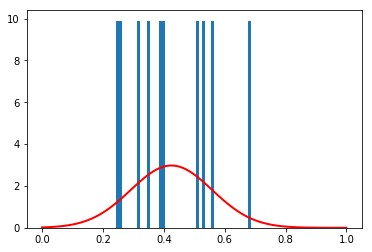

In [5]:
# For 10 samples...

x = np.linspace(0, 1, 100)
num_of_samples = 10
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

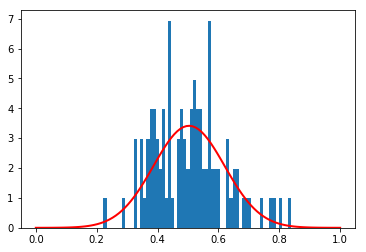

In [6]:
# For 100 samples...
x = np.linspace(0, 1, 100)
num_of_samples = 100
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

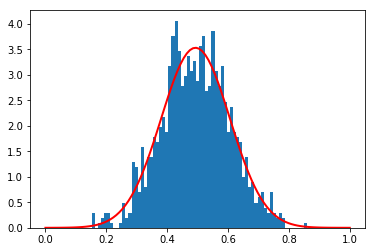

In [7]:
#For 1000 samples...

x = np.linspace(0, 1, 100)
num_of_samples = 1000
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

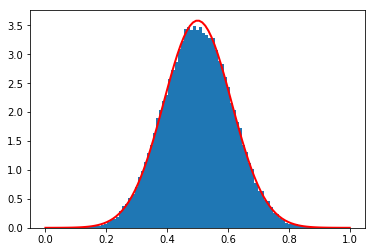

In [8]:
# For 100000 samples...
x = np.linspace(0, 1, 100)
num_of_samples = 100000
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

### That looks very close to a gaussian even thought the distribution we sampled from (i.e., a beta distribution) looks nothing like a gaussian! 

### Laplace saw this and realized that Gauss' "least squares approach" could handle residual error regardless of how that error was distributed. This was an important *theoretical* argument for modeling error as a gaussian.  

# Intermission: Queletet and constant causes

At this point, we could stop here to have a conversation (as we did in class) about how Queletet argued that one could conflate "objective means" and "subjective means" in order to discuss populations (i.e., his "average man"). It took nearly a century to build off of the Gauss-Laplace synthesis, largely because of the interpretative challenge of equating objective and subjective means as identical (something that happened with Pearson, Galton, and others at then end of the 19th century).

## Linear Regression, round 2
- What kind of machine learning technique is linear regression? (Contemporary context)
        - Three kinds of ML techniques
    
- What problem was Francis Galton and Karl Pearson were interested in solving? 
        

[ 1.14316436 -0.26820177  3.60549628  1.86616955  1.7977121  -4.19774788
 -1.60620552  3.7187332  -0.54018054 -0.24915913  0.96821613  0.4873541
 -0.44792657  0.05899848 -0.1523181   2.3032675  -1.916987    1.35347147
 -1.22562829 -0.65677868 -0.14921251  4.29832966 -0.15625948  3.25838286
  0.8456123  -1.60341394 -0.02477169 -0.46993461 -2.2208027  -1.54449838] [ 5.91638883  0.20660887  3.90023005 -1.91303113  6.51589795 -2.14166138
 -3.04202186  2.20210129  0.17013145 -0.39762458  4.99621242  3.17873667
  1.71939226 -3.58386099  2.70019728 -4.65232946  2.52804971 -1.31021956
  0.9192916   4.6111897   2.72064176  1.95161415  0.95519646  1.03353929
  4.95649554  2.15162518  6.72278209  7.0322729   2.77050969  1.94855952]


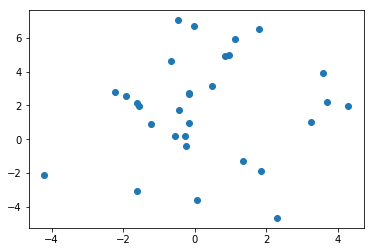

In [9]:
# Let's begin by generating and plotting "simulated" data
from numpy.random import normal
mu, sigma = 0, 2.0
random_x = normal(mu, sigma, 30)
random_y = normal(2, 3, 30)

#output actual list of data
print(random_x, random_y)

#plot data
plt.scatter(random_x, random_y)
plt.show()


,x,y
0,1.143164,5.916389
1,-0.268202,0.206609
2,3.605496,3.900230
3,1.866170,-1.913031
4,1.797712,6.515898
5,-4.197748,-2.141661
6,-1.606206,-3.042022
7,3.718733,2.202101
8,-0.540181,0.170131
9,-0.249159,-0.397625


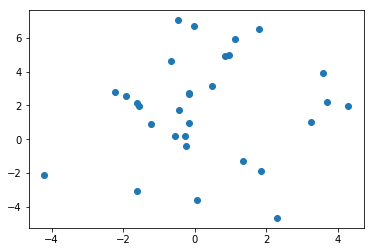

In [10]:
## We can put this data into pandas, allowing us to reference
## this data via column name

d = {'x' : pd.Series(random_x),  'y' : pd.Series(random_y)}
dat = pd.DataFrame(d)

#plot data
plt.scatter(dat["x"], dat["y"])

#output dataframe
dat

Linear Regression IN GENERAL:

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$

Linear Regression FOR JUST ONE VARIABLE:

$y = \beta_1 x_1 + \mu$ 

where $\beta_1$ is the slope, $x$ are the observations, and $\mu$ is the y-intercept.  

In [11]:
import statsmodels.formula.api as sm
sm_lm = sm.ols(data = dat, formula = "y ~ x").fit()

print(sm_lm.summary())
print("----")
print(sm_lm.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3370
Date:                Tue, 13 Feb 2018   Prob (F-statistic):              0.566
Time:                        12:54:04   Log-Likelihood:                -75.557
No. Observations:                  30   AIC:                             155.1
Df Residuals:                      28   BIC:                             157.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7775      0.574      3.099      0.0

Thus we get:
    
$y = (coefficient.of.x)*x + (intercept.coefficient)$

which you can easily plot:

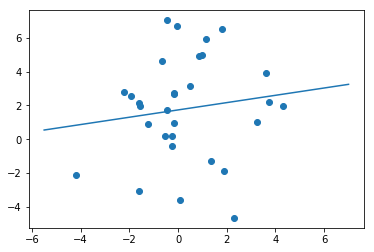

In [12]:
#from above, look up the following two coefficients and input their values below:
# YOU MUST CHANGE THESE VALUES EACH TIME YOU GENERATE NEW DATA
x_coefficient = 0.216519
intercept = 1.732801

plt.scatter(dat["x"], dat["y"])
x = np.linspace(-5.5, 7, 100)
plt.plot(x,x_coefficient*x + intercept)
plt.show()

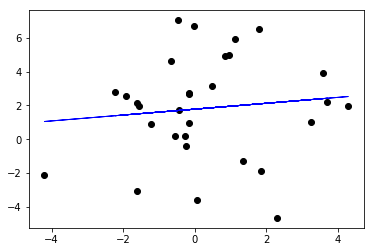

In [13]:
# We can do the same thing in scikit-learn and its faster and therefore more useful when handling slightly bigger data sets
# IN THIS CASE, SKLEARN PLOTS LINE AUTOMATICALLY

from sklearn import linear_model

dat_array = np.asarray(dat)
skl_lm = linear_model.LinearRegression()
x = dat.x.values
x = x.reshape(len(x), 1) #note that scikit-learn requires an input-matrix of a particular shape...

# now we do the above two operations for y in one line...
y = (dat.y.values).reshape(len(dat.y.values), 1)

# generate model
skl_lm.fit(x, y)

# plot fit line
plt.scatter(x, y,  color='black')
plt.plot(x, skl_lm.predict(x), color='blue', linewidth=1)
plt.show()